# H8PTP Final Project Intro Python for Data Science Batch 30
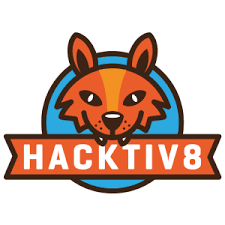

# Mall Customer : Analisis Data Eksploratif & Visualisasi Data


Ini adalah sebuah set data tentang pelanggan/pengunjung disuatu mall atau pusat perbelanjaan. Dataset ini memberi informasi tentang pola belanja dan karakter dari masing-masing pelanggan yang berkunjung ke pusat perbelanjaan.

File ini berisi informasi dasar tentang pelanggan mall :
1. CustomerID
2. Gender
3. Age
4. Annual Income (k$)
5. Spending Score (1-100)

## Informasi Data:
Data ini dibuat hanya untuk tujuan pembelajaran konsep segmentasi pelanggan, juga dikenal sebagai Market basket analysis atau suatu analisa atas perilaku konsumen secara spesifik dari suatu golongan / kelompok tertentu. Saya akan menunjukkan ini dengan menggunakan teknik Unsupervised Machine Learning dengan metode (KMeans Clustering Algorithm) dalam bentuk paling sederhana.

Sumber data : https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## Konten Analisa

Diibaratkan kita memiliki sebuah supermarket dengan kartu keanggotaan, kita memiliki beberapa basis data tentang pelanggan kita seperti ID Pelanggan, usia, jenis kelamin, pendapatan tahunan, dan skor pengeluaran.
Skor Pengeluaran adalah sesuatu yang kita tetapkan untuk pelanggan berdasarkan parameter yang kita tentukan seperti perilaku pelanggan dan data pembelian.

## Permasalahan

Kita ingin memahami pelanggan seperti apa yang kita miliki serta siapa saja pelanggan yang dapat kita sebut **Target Pelanggan** sehingga dapat memberikan sebuah masukan berupa sebuah insight/wawasan kepada tim pemasaran dan merencanakan strategi yang sesuai untuk pemasaran dimasa yang akan datang.

## Tujuan

Pada akhir studi kasus ini, kita akan dapat menjawab pertanyaan seperti :
1. Cara mencapai segmentasi pelanggan menggunakan algoritma machine learning (KMeans Clustering) dengan Python dengan cara paling sederhana.
2. Siapa target pelanggan kita dan dengan siapa kita dapat memulai mengarahkan strategi pemasaran yang kita buat
3. Bagaimana sebuah strategi pemasaran bekerja di dunia nyata

## 1.1 Mall Customer Dataset : Analisis Data Exploratif (EDA)

Memahami isi data Sebelum melakukan feature engineering dan modeling.

### Import Modules

In [1]:
import pandas as pd

### Load Dataset

In [2]:
mall_df = pd.read_csv('Mall_Customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Drop Column "CustomerID"

In [3]:
#membuang kolom yang tidak akan digunakan dalam proses analisa data

mall_df.drop(columns = 'CustomerID', inplace = True)
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Identifikasi bentuk/dimensi dataset

In [4]:
# memeriksa bentuk/dimensi dataset

mall_df.shape

(200, 4)

### Identifikasi daftar nama dan type data dari masing-masing kolom

In [5]:
mall_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [6]:
mall_df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Identifikasi informasi dataset

In [7]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


### Memeriksa data yang kosong

In [8]:
# memeriksa apakah ada NULL data

mall_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Memeriksa duplikasi data

In [9]:
# memeriksa apakah ada data duplikasi dalam dataset

mall_df[mall_df.duplicated(keep = False)]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


### Mendeskripsikan dataset

In [10]:
# mendeskripsikan nilai statistik dari masing-masing kolom dataset

mall_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Memeriksa Korelasi Matrix dataset

In [11]:
# memeriksa nilai korelasi dari masing-masing variabel yang ada di dataset

mall_df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [12]:
# memisahkan customer laki-laki dan perempuan

pengunjung_lelaki = mall_df[mall_df['Gender'] == 'Male']
pengunjung_perempuan = mall_df[mall_df['Gender'] == 'Female']

In [13]:
# mencari nilai rata-rata pengeluaran dari keduanya

print(pengunjung_lelaki['Spending Score (1-100)'].mean())
print(pengunjung_perempuan['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


### Isi dari dataset pelanggan mall (Mall Customer)

1. Dataset Mall Customer merupakan dataset yang terdiri dari 200 baris data dan 5 kolom kelompok data, akan tetapi kolom data berupa CustomerID tidak digunakan dalam proses analisa data oleh karena itu kolom tersebut didrop dari dataset.
2. Dataset Mall Customer memberikan informasi berupa :
   - usia pelanggan dengan rentang 18 - 70 tahun
   - jenis kelamin pelanggan,
   - penghasilan pelanggan pertahun dengan rentang 15 - 137 ribu dollar pertahun, dan 
   - nilai spending pelanggan di mall yang ditentukan berdasarkan parameter tertentu oleh pelaku bisnis.
3. Tipe data untuk variabel usia, penghasilan pertahun, dan nilai spending pelanggan merupakan data numerik berupa tipe data `int` dan tipe data untuk jenis kelamin pelanggan merupakan data object berupa tipe data `str`.
4. Dataset Mall Customer tidak memiliki data yang kosong dan data yang duplikasi sehingga data sudah dapat digunakan untuk diproses ke tahap analisa.
5. Dari hasil uji korelasi Dataset Mall Customer tidak menunjukan korelasi yang kuat antar variabelnya.
6. Dari hasil perhitungan diatas dapat dilihat bahwa rata-rata nilai pengeluaran perempuan lebih besar dibandingkan laki-laki

## 1.2 Mall Customer Dataset : Visualisasi Data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Perbandingan jumlah pengunjung berdasarkan jenis Kelamin

Kita akan melihat perbandingan jumlah pengunjung/pelanggan mall berdasarkan jenis kelaminnya. Pada diagram berikut terlihat bahwa pengunjung/pelanggan mall didominasi oleh perempuan sebesar 56% dari total pengunjung sedangkan pengunjung laki-laki hanya 44 %.

Text(0.5, 1.0, 'Pelanggan Mall Berdasarkan Gender')

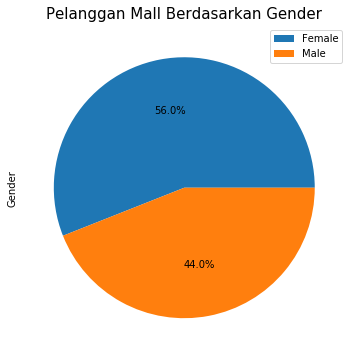

In [15]:
mall_df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', figsize = (10, 6), labels = None, legend = True)
plt.title('Pelanggan Mall Berdasarkan Gender', fontsize = 15)

### Distribusi jumlah pengunjung berdasarkan usia, penghasilan pertahun, dan nilai pengeluaran

Selanjutnya kita akan melihat distribusi pengunjung/pelanggan mall berdasarkan kriteria lainnya yaitu :

In [16]:
# menghitung jumlah pengunjung mall berdasarkan usia

mall_df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

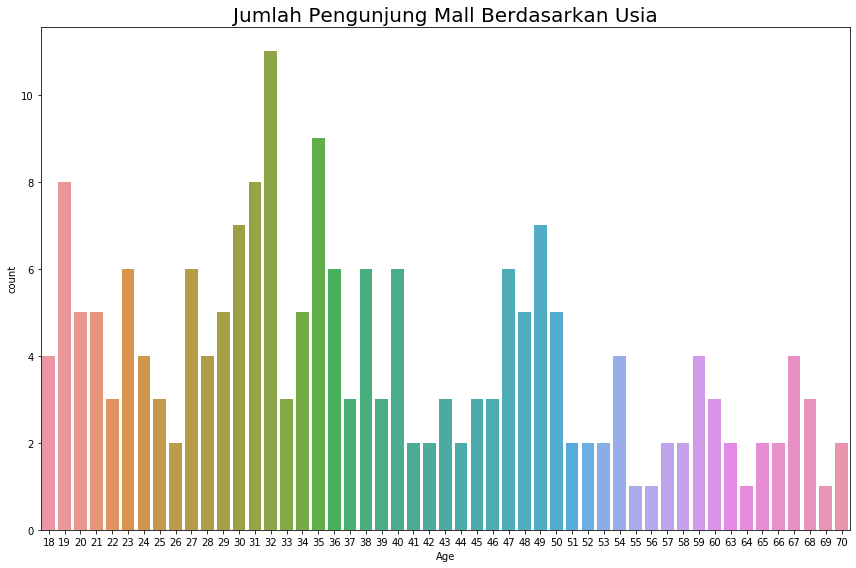

In [17]:
plt.subplots(figsize=(12, 8))
sns.countplot(data = mall_df, x = 'Age')
plt.title('Jumlah Pengunjung Mall Berdasarkan Usia', fontsize = 20)

plt.tight_layout()

Berdasarkan grafik diatas dapat dilihat bahwa :
1. Usia termuda pengunjung mall adalah 18 tahun dan paling tua adalah 70 tahun
2. Usia pengunjung mall paling banyak adalah usia diantara 30 - 35 Tahun
3. Usia pengunjung mall paling sedikit adalah usia 55 - 70 tahun

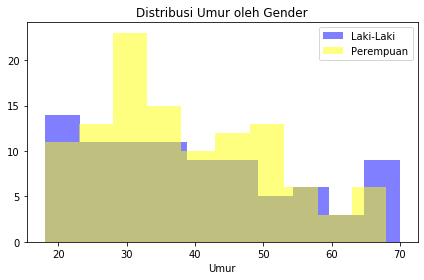

In [18]:
plt.hist('Age', data = mall_df[mall_df['Gender'] == 'Male'], alpha = 0.5, label = 'Laki-Laki', color = 'blue')
plt.hist('Age', data = mall_df[mall_df['Gender'] == 'Female'], alpha = 0.5, label = 'Perempuan', color ='yellow')
plt.title('Distribusi Umur oleh Gender')
plt.xlabel('Umur')
plt.tight_layout()
plt.legend()

Selanjutnya kita coba bandingkan pengunjung mall berdasarkan usia dengan jenis kelaminnya. Pada grafik histogram diatas kita bisa melihat perbandingan distribusi umur pengunjung mall berdasarkan gendernya.

Dapat dilihat bahwa perempuan dengan umur 24 - 38 mendominasi sebagai pengunjung terbanyak. Sedangkan pengunjung yang sedikit adalah laki-laki dan perempuan berumur diantara 59-63 tahun.

In [19]:
mall_df['Annual Income (k$)'].value_counts()

54     12
78     12
60      6
87      6
62      6
       ..
61      2
126     2
59      2
58      2
15      2
Name: Annual Income (k$), Length: 64, dtype: int64

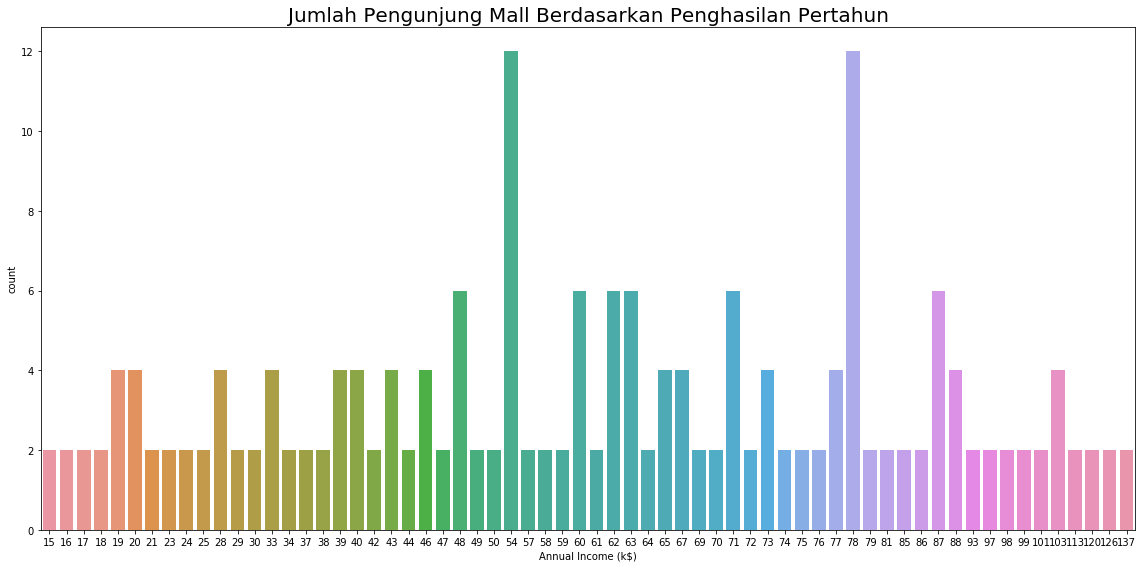

In [20]:
plt.subplots(figsize=(16, 8))
sns.countplot(data = mall_df, x = 'Annual Income (k$)')
plt.title('Jumlah Pengunjung Mall Berdasarkan Penghasilan Pertahun', fontsize = 20)
plt.tight_layout()

Berdasarkan grafik diatas dapat dilihat bahwa pengunjung mall paling banyak berpenghasilan dalam range 48 - 87 ribu USD/Tahun

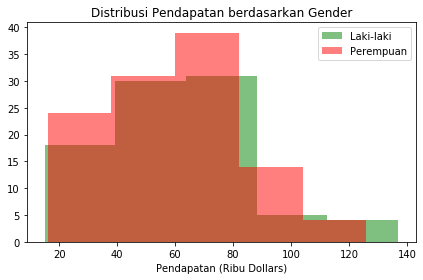

In [21]:
plt.hist('Annual Income (k$)', data = mall_df[mall_df['Gender'] == 'Male'], alpha=0.5, label='Laki-laki', color = 'green', bins = 5)
plt.hist('Annual Income (k$)', data = mall_df[mall_df['Gender'] == 'Female'], alpha=0.5, label='Perempuan', color = 'red', bins = 5)
plt.title('Distribusi Pendapatan berdasarkan Gender')
plt.xlabel('Pendapatan (Ribu Dollars)')
plt.tight_layout()
plt.legend()

Lalu kita akan mencoba memvisualisasikan data untuk melihat apakah ada keterkaitan dari pendapatan masing-masing gender terhadap kebiasaan belanja.

Berdasarkan grafik di atas dapat terlihat bahwa sebenarnya pengunjung dengan pendapatan tertinggi adalah laki-laki. Akan tetapi jumlahnya lebih sedikit dibandingkan pelanggan perempuan.

Jumlah distribusi pengunjung tertinggi berada di kisaran pendapatan 60-80 ribu dollar dan didominasi oleh pengunjung perempuan.

In [22]:
mall_df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

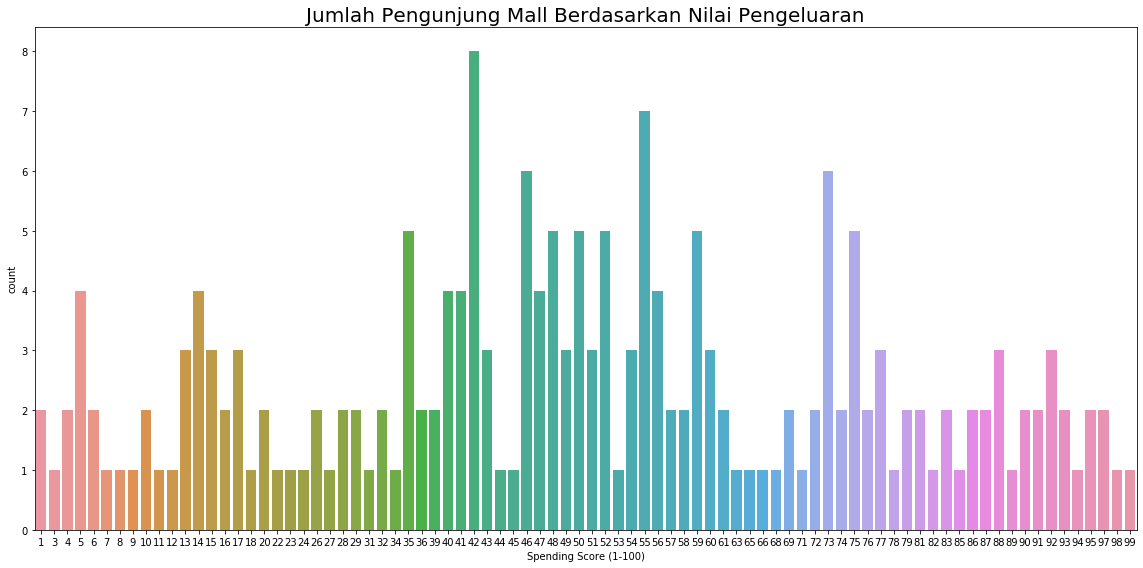

In [23]:
plt.subplots(figsize=(16, 8))
sns.countplot(data = mall_df, x = 'Spending Score (1-100)')
plt.title('Jumlah Pengunjung Mall Berdasarkan Nilai Pengeluaran', fontsize = 20)
plt.tight_layout()

Selanjutnya kita melihat distrubisi pengunjung mall berdasarkan nilai pengeluarannya.

Berdasarkan grafik dapat dilihat bahwa nilai pengeluaran paling tinggi berada di range 90-100 akan tetapi jumlahnya sedikit.
Nilai pengeluaran pengunjung mall paling banyak ada di range 40 - 60 poin.

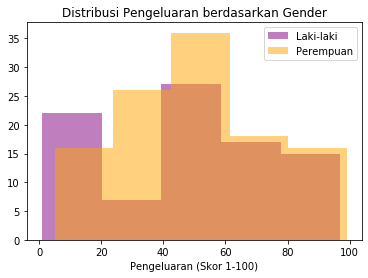

In [24]:
plt.hist('Spending Score (1-100)', data = mall_df[mall_df['Gender'] == 'Male'], alpha=0.5, label='Laki-laki', color = 'purple', bins = 5)
plt.hist('Spending Score (1-100)', data = mall_df [mall_df['Gender'] == 'Female'], alpha=0.5, label='Perempuan', color = 'orange', bins = 5)
plt.title('Distribusi Pengeluaran berdasarkan Gender')
plt.xlabel('Pengeluaran (Skor 1-100)')
plt.legend()

Lalu kita akan mencoba memvisualisasikan data untuk melihat apakah ada keterkaitan dari gender terhadap kebiasaan belanja.

Berdasarkan grafik di atas dapat terlihat bahwa kebiasaan belanja dengan nilai pengeluaran yang tinggi didominasi oleh perempuan. sedangkan pelanggan lelaki jumlahnya lebih sedikit dibandingkan pelanggan perempuan.

Jumlah distribusi pengunjung tertinggi berada di kisaran pendapatan 60-80 ribu dollar dan didominasi oleh pengunjung perempuan. Total pelanggan dengan nilai Pengeluaran paling banyak didominasi oleh perempuan di kisaran skor 35-60.

### Distribusi Pengunjung Mall Berdasarkan Karakteristiknya

Memvisualisasikan distribusi data pengamatan pengunjung mall meliputi data q1,q2, dan q3, nilai minimal, nilai maksimal serta mengindentifikasi data yang berpotensi sebagai outlier.

Text(0.5, 1, 'Distribusi Pengunjung Mall')

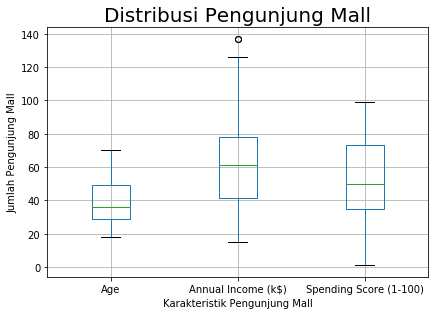

In [25]:
mall_df.boxplot()
plt.tight_layout()
plt.ylabel('Jumlah Pengunjung Mall')
plt.xlabel('Karakteristik Pengunjung Mall')
plt.title('Distribusi Pengunjung Mall', fontsize = 20)

Berdasarkan grafik diatas :
1. Rata-rata umur pengunjung mall adalah 38 tahun
2. Rata-rata penghasilan pertahun pengunjung mall adalah 60 USD
3. Rata-rata score pengeluaran pengunjung mall adalah 60
4. Terdapat data outlier dari pengunjung mall dengan nilai penghasilan yang tinggi.

Dari data tersebut dapat dikatakan bahwa pengunjung dengan nilai rata-rata tersebut merupakan daily customer (pelanggan harian) dari mall. Sedangkan kita masih memiliki data pelanggan dengan nilai diatas nilai rata-rata tersebut cukup banyak, oleh karena itu perlu kita tinjau kembali berapa banyak pelanggan dengan nilai rata-rata diatas yang berpotensi menjadi pelanggan prioritas.


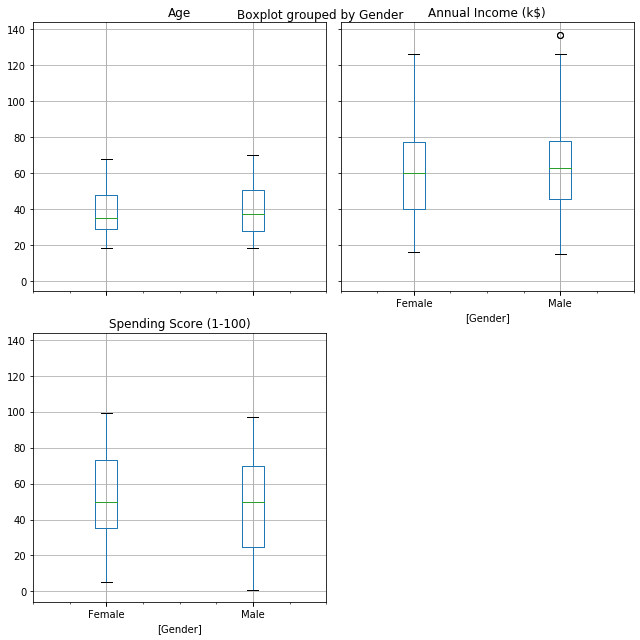

In [26]:
mall_df.boxplot(by = 'Gender', figsize = (9, 9))
plt.tight_layout()

Visualisasi diatas untuk melihat nilai rata-rata pelanggan berdasarkan gender dan mengidentifikasi posisi nilai outlier

### Identifikasi hubungan antar variabel dari set data Mall Customer

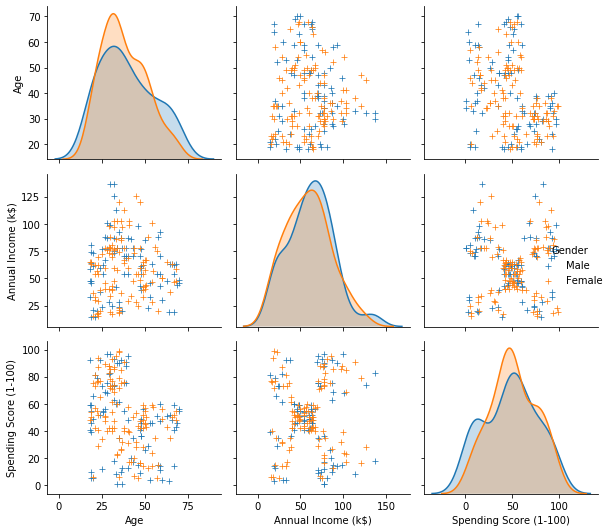

In [27]:
sns.pairplot(mall_df, hue = 'Gender', markers = '+')
plt.tight_layout()

Text(0.5, 1, 'Heatmap Data Pelanggan Mall')

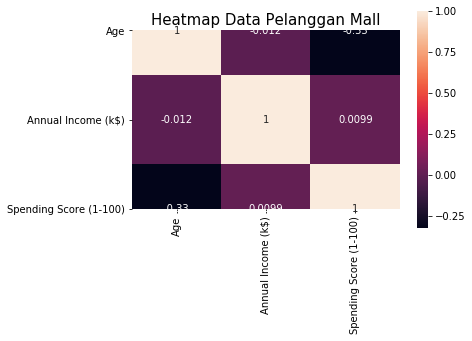

In [28]:
sns.heatmap(mall_df.corr(), square = True, annot = True)

plt.title('Heatmap Data Pelanggan Mall', fontsize = 15)

Grafik dan diagram diatas memvisualisasikan correlation matriks untuk melihat korelasi antar variabel dari set data. Terlihat bahwa korelasi antar variabel dari set data mall customer sangat lemah sehingga akan sulit melakukan segmentasi dari pelanggan dengan metode klasifikasi. Oleh karena itu selanjutnya akan dicoba melakukan segmentasi pelanggan dengan menggunakan metode pembagian klaster.

## 1.3 Mall Customer Dataset : Customer Segmentation Clustering Model dengan metode K-Means

Segmentasi pelanggan dilakukan untuk membagi pelanggan menjadi kelompok-kelompok berbeda yang memiliki kebutuhan, karakteristik, atau perilaku yang berbeda yang mungkin membutuhkan produk atau bauran pemasaran yang berbeda.

### Segmentasi Pengunjung Mall berdasarkan penghasilan

In [29]:
# untuk melihat segmentasi, perlu memisahkan data yang akan di segmenkan
# data yang digunakan adalah data penghasilan dan pengeluaran

PM = mall_df.iloc[:, [2,3]].values
print(PM)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

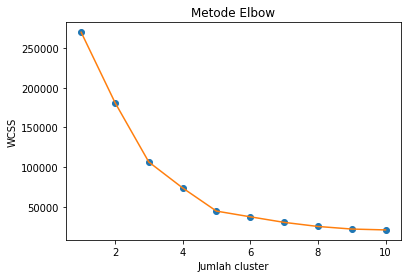

In [30]:
from sklearn.cluster import KMeans
wcss = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
    kmeans.fit(PM)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss, '-')
plt.title('Metode Elbow')
plt.xlabel('Jumlah cluster')
plt.ylabel('WCSS')
plt.show()

Dapat dilihat pada grafik di atas bahwa bentuk siku terlihat pada K = 3 dan K = 5. 

Dalam kondisi seperti ini, di mana K = 3 dan K = 5 menunjukkan bentuk siku, nilai K yang dipilih adalah yang nilainya lebih besar, dalam hal ini K = 5.

In [31]:
#membuat model K-Means

kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(PM)

#untuk unsupervised learning kita gunakan "fit_predict()" sedangkan untuk supervised learning menggunakan "fit_tranform()

In [32]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [33]:
print(y_kmeans)

#untuk lebih simpel data y_kmeans diconvert ke bentuk data frame atau tabel
df_kmeans = pd.DataFrame(y_kmeans)
df_kmeans.head(10)

#array/data frame di bawah memiliki arti yaitu pengunjung 1 masuk ke cluster 4 (karena 0 adalah 1 dan 3 adalah 4) dst

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


,0
0,3
1,1
2,3
3,1
4,3
5,1
6,3
7,1
8,3
9,1


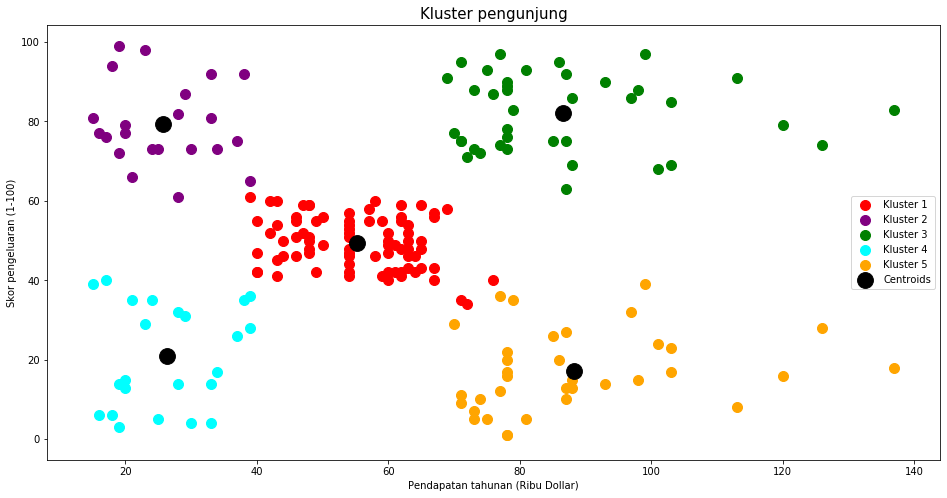

In [34]:
# Visualisasi hasil clusters

plt.figure(1 , figsize = (16 , 8))
plt.scatter(PM[y_kmeans == 0, 0], PM[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Kluster 1')
plt.scatter(PM[y_kmeans == 1, 0], PM[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Kluster 2')
plt.scatter(PM[y_kmeans == 2, 0], PM[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Kluster 3')
plt.scatter(PM[y_kmeans == 3, 0], PM[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Kluster 4')
plt.scatter(PM[y_kmeans == 4, 0], PM[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Kluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'black', label = 'Centroids')
plt.title('Kluster pengunjung', fontsize = 15)
plt.xlabel('Pendapatan tahunan (Ribu Dollar)')
plt.ylabel('Skor pengeluaran (1-100)')
plt.legend()
plt.show()

Titik yang berwarna hitam adalah Centroids
- Kluster 1 -> Pendapatan menengah dan pengeluaran menengah
- Kluster 2 -> Pendapatan rendah tetapi pengeluaran tinggi
- Kluster 3 -> Pendapatan tinggi dan pengeluaran tinggi
- Kluster 4 -> Pendapatan rendah dan pengeluaran rendah
- Kluster 5 -> Pendapatan tinggi tetapi pengeluaran tinggi

### Segmentasi Pengunjung Mall berdasarkan Usia dengan metode K-Means

In [35]:
# data yang digunakan adalah data usia dan pengeluaran

AGM = mall_df.iloc[:, [1,3]].values
print(AGM)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

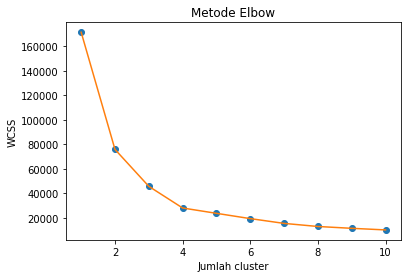

In [36]:
wcss = []
for n in range(1, 11):
    km = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
    km.fit(AGM)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss, '-')
plt.title('Metode Elbow')
plt.xlabel('Jumlah cluster')
plt.ylabel('WCSS')
plt.show()

Dapat dilihat pada grafik di atas bahwa bentuk siku terlihat pada K = 2 dan K = 4.

Dalam kondisi seperti ini, di mana K = 2 dan K = 4 menunjukkan bentuk siku, nilai K yang dipilih adalah yang nilainya lebih besar, dalam hal ini K = 4.

In [37]:
km = KMeans(n_clusters = 4)
y_km = km.fit_predict(AGM)

In [38]:
km.cluster_centers_

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

In [39]:
print(y_km)

df_km = pd.DataFrame(y_km)
df_km.head(10)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


,0
0,3
1,1
2,2
3,1
4,3
5,1
6,2
7,1
8,2
9,1


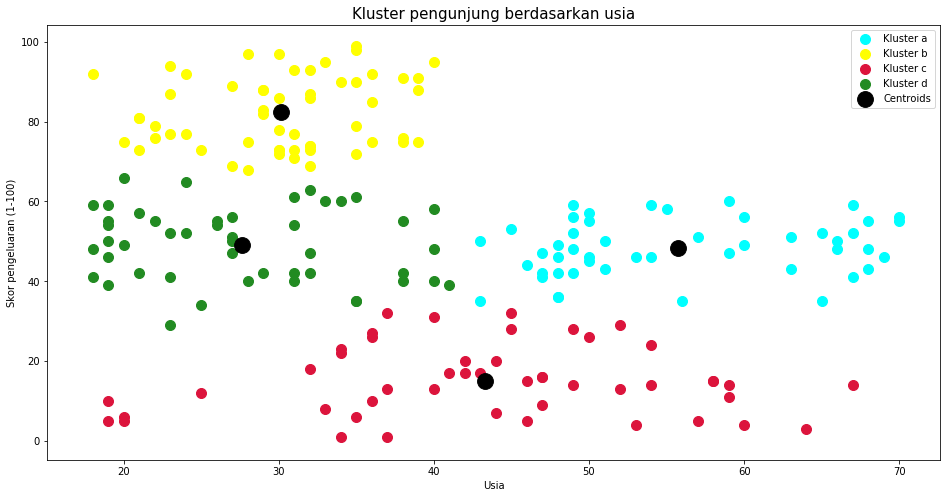

In [40]:
plt.figure(1 , figsize = (16 , 8))
plt.scatter(AGM[y_km == 0, 0], AGM[y_km == 0, 1], s = 100, c = 'aqua', label = 'Kluster a')
plt.scatter(AGM[y_km == 1, 0], AGM[y_km == 1, 1], s = 100, c = 'yellow', label = 'Kluster b')
plt.scatter(AGM[y_km == 2, 0], AGM[y_km == 2, 1], s = 100, c = 'crimson', label = 'Kluster c')
plt.scatter(AGM[y_km == 3, 0], AGM[y_km == 3, 1], s = 100, c = 'forestgreen', label = 'Kluster d')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, c = 'black', label = 'Centroids')
plt.title('Kluster pengunjung berdasarkan usia', fontsize = 15)
plt.xlabel('Usia')
plt.ylabel('Skor pengeluaran (1-100)')
plt.legend()
plt.show()

Titik yang berwarna hitam adalah Centroids
- Kluster a -> Merupakan pelanggan berusia tua > 40 tahun dengan nilai pengeluaran menengah
- Kluster b -> Merupakan pelanggan usia muda dengan nilai pengeluaran tinggi
- Kluster c -> Merupakan pelanggan dari semua usia dengan nilai pengeluaran rendah
- Kluster d -> Merupakan pelanggan potensial berusia muda < 40 tahun dengan nilai pengeluaran menengah

## 1.4 Kesimpulan

Hasil Segmentasi pengunjung mall dari hasil pembagian klaster diatas yaitu : 
1. Terdapat 1 kelompok pelanggan yang memiliki nilai diatas rata-rata yaitu orang dengan pendapatan tinggi dan pengeluaran yang tinggi dapat dilihat pada klaster 3 grafik diatas. 
2. Terdapat 1 kelompok pelanggan yang memiliki nilai penghasilan dibawah rata-rata pelanggan akan tetapi memiliki pengeluaran yang tinggi dapat dilihat pada klaster 2 grafik diatas
3. Segmentasi pelanggan berdasarkan usia terlihat bahwa nilai pengeluaran tertinggi didominasi oleh pengunjung usia muda yaitu rentang umur 18 - 40 tahun.

Dari hasil pengelompokan tersebut diketahui bahwa faktor utama yang mempengaruhi kebiasaan belanja pelanggan adalah usia pelanggan. Karena dari hasil segmentasi diatas terlihat bahwa pelanggan yang memiliki penghasilan dibawah rata-rata pelanggan lainnya masih memiliki nilai pengeluaran yang tinggi oleh karena itu pasti ada faktor lainnya yang mempengaruhi kebiasaan belanja selain nilai penghasilan.